<h1>Соколов Б ИУ5-64Б НИР</h1>

<h1>Датасет</h1>
https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

<h4>Подключим всё необходимое

In [110]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [94]:
data = pd.read_csv('housing.csv', sep=",")

In [95]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [104]:
data.shape

(20640, 10)

In [96]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<h4>Проведем разведку данных

Проверим есть ли пропущенные значения

In [97]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Заполним средним значением

In [98]:
mean_total_bedrooms = data['total_bedrooms'].mean()
data['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)

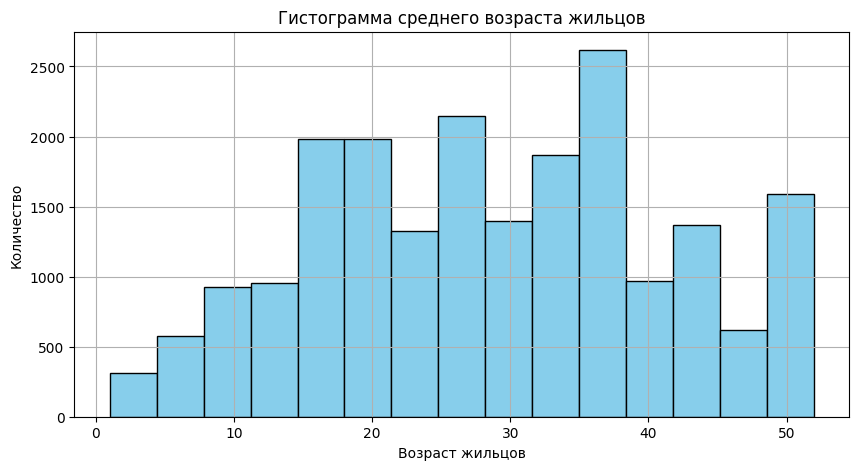

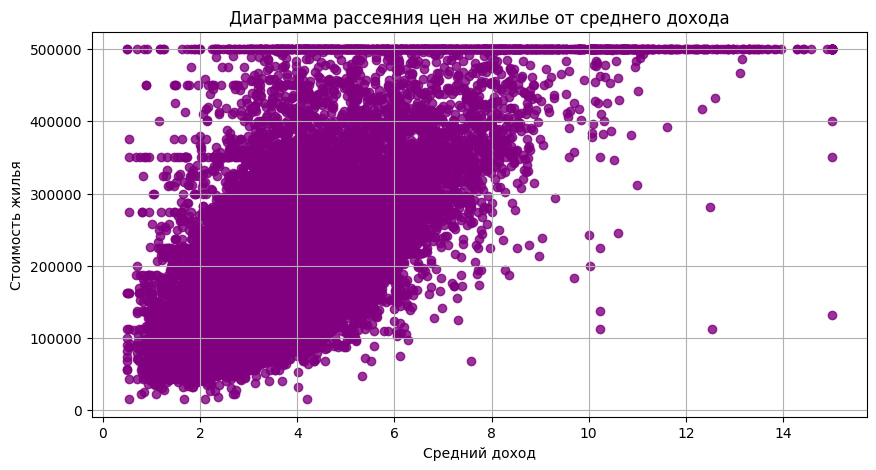

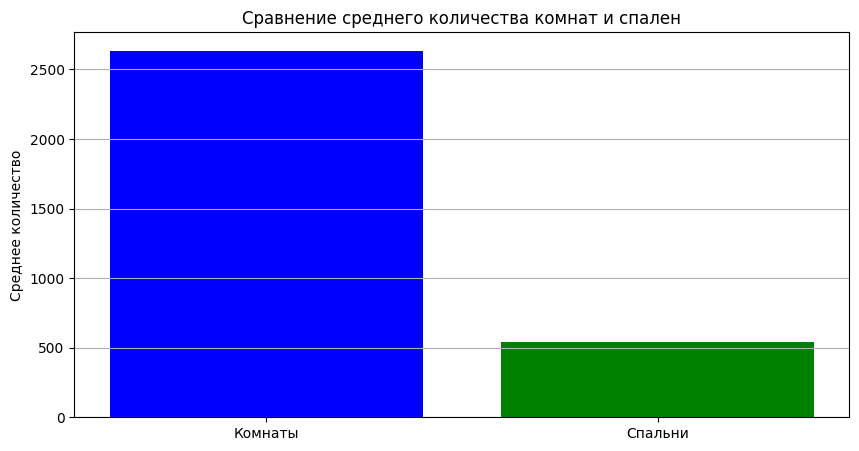

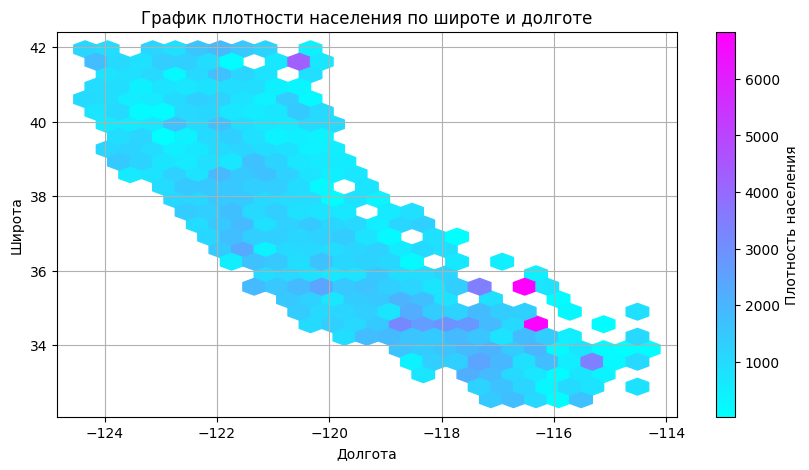

In [99]:
import matplotlib.pyplot as plt
import pandas as pd


# Гистограмма возраста жилья
plt.figure(figsize=(10, 5))
plt.hist(data['housing_median_age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Гистограмма среднего возраста жильцов')
plt.xlabel('Возраст жильцов')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

# Диаграмма рассеяния цен на жилье от медианного дохода
plt.figure(figsize=(10, 5))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.8, c='purple')
plt.title('Диаграмма рассеяния цен на жилье от среднего дохода')
plt.xlabel('Средний доход')
plt.ylabel('Стоимость жилья')
plt.grid(True)
plt.show()

# Столбчатая диаграмма для сравнения среднего количества комнат и спален
rooms = data['total_rooms'].mean()
bedrooms = data['total_bedrooms'].mean()

plt.figure(figsize=(10, 5))
plt.bar(['Комнаты', 'Спальни'], [rooms, bedrooms], color=['blue', 'green'])
plt.title('Сравнение среднего количества комнат и спален')
plt.ylabel('Среднее количество')
plt.grid(True, axis='y')
plt.show()

# График плотности населения по широте и долготе
plt.figure(figsize=(10, 5))
plt.hexbin(data['longitude'], data['latitude'], C=data['population'], gridsize=25, cmap='cool')
plt.colorbar(label='Плотность населения')
plt.title('График плотности населения по широте и долготе')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid(True)
plt.show()

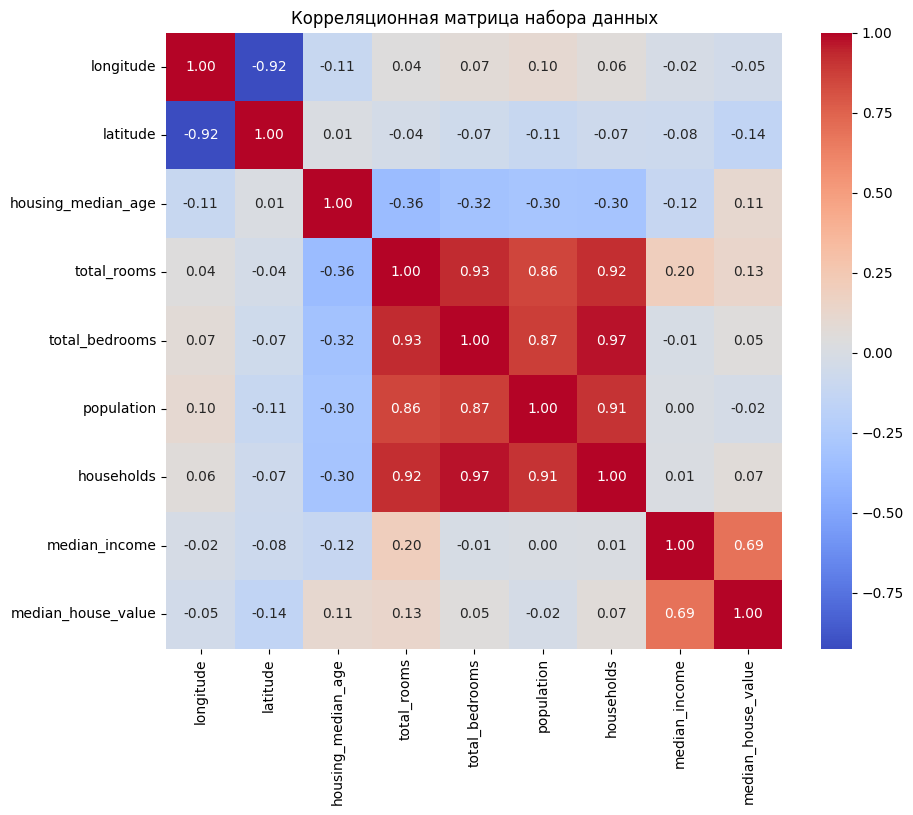

In [100]:
# Исключение нечисловых столбцов
numeric_data = data.select_dtypes(include=[np.number])

# Вычисление корреляционной матрицы для числовых столбцов
corr_matrix = numeric_data.corr()

# Создание тепловой карты корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица набора данных')
plt.show()

Можно наблюдать сильную корреляцию между количеством жильцов и количеством комнат, между средним доходом и средей стоимостью жилья. Умеренная - между жильцами и их средним возрастом.

### Предобработка данных

In [101]:
# Создание словаря для соответствия категорий и чисел
categories_to_numbers = {
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    'ISLAND': 5
}

# Замена категорий числами в столбце 'ocean_proximity'
data['ocean_proximity'] = data['ocean_proximity'].map(categories_to_numbers)

# Проверка результатов
print(data['ocean_proximity'].head())

0    4
1    4
2    4
3    4
4    4
Name: ocean_proximity, dtype: int64


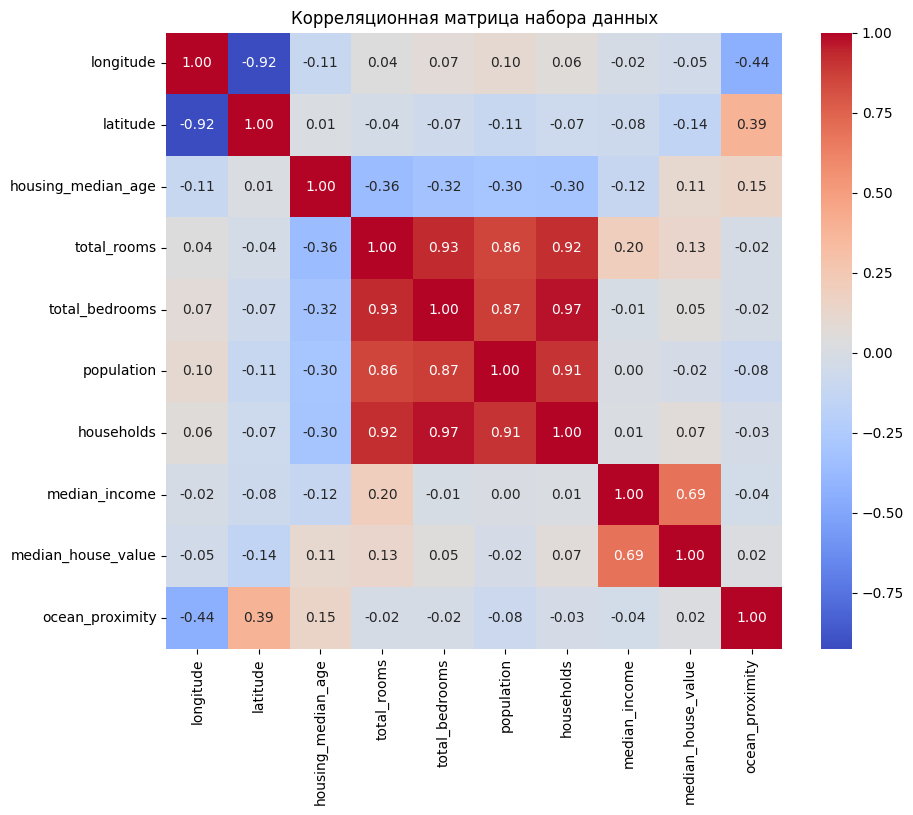

In [102]:
# Вычисление корреляционной матрицы для числовых столбцов
corr_matrix = data.corr()

# Создание тепловой карты корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица набора данных')
plt.show()

In [87]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object

### Выбор метрик для оценки качества моделей


Для оценки качества моделей регрессии мы выберем следующие три метрики:

1. ***R^2*** (коэффициент детерминации): Он показывает, какую часть дисперсии зависимой переменной объясняют независимые переменные. Это очень популярная метрика для оценки качества регрессионных моделей.
   
2. ***MAE*** (средняя абсолютная ошибка): Данная метрика позволяет оценить среднюю абсолютную ошибку в предсказаниях, что помогает нам понять среднюю разницу между фактическим и предсказанным значениями.
   
3. ***RMSE*** (квадратичная средняя ошибка): Является более чувствительной к большим отклонениям между фактическим и предсказанным значениями, чем MAE, и часто используется в задачах регрессии.

In [88]:
# Определим функции для вычисления выбранных метрик
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return {"R^2": r2, "MAE": mae, "RMSE": rmse}

### Выбор моделей для решения задачи регрессии
1. Ансамблевая модель случайного леса
2. Метод К-ближайших соседей
3. Метод опорных векторов
4. Градиентный бустинг
5. Решающее дерево

In [89]:
models = {
    "Random Forest": RandomForestRegressor(),
    "K-Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Decision Tree": DecisionTreeRegressor(),  
}

### Формирование обучающей и тестовой выборок на основе исходного набора данных

In [107]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


In [108]:
# Разделим наш датасет на признаки и целевую переменную
data.dropna()
x = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Построим базовые модели и сделаем предсказания

In [112]:
base_results = {}
imputer = SimpleImputer(strategy='most_frequent')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    base_results[name] = evaluate_model(y_test, y_pred)

print("Baseline Results")
for name, metrics in base_results.items():
    print(f"{name}: R^2: {metrics['R^2']:.4f}, MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}")

Baseline Results
Random Forest: R^2: 0.8104, MAE: 32009.1166, RMSE: 49844.2873
K-Neighbors: R^2: 0.2237, MAE: 78365.3029, RMSE: 100856.5830
Support Vector Machine: R^2: -0.0487, MAE: 87342.2458, RMSE: 117224.9936
Gradient Boosting: R^2: 0.7597, MAE: 38634.9416, RMSE: 56116.8710
Decision Tree: R^2: 0.6506, MAE: 43323.6873, RMSE: 67668.4107


### Подберем гиперпараметры выбранных моделей

In [113]:
# Определим гиперпараметры для каждой модели
# Случайный лес
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# K-Neighbors Regressor
knn_params = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Метод опорных векторов
svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

# Градиентный бустинг
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'max_depth': [3, 7, 10]
}

# Решающее дерево
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

params = {
    "Random Forest": rf_params,
    "K-Neighbors": knn_params,
    "Support Vector Machine": svr_params,
    "Gradient Boosting": gb_params,
    "Decision Tree": dt_params,   
}

# Используем GridSearchCV для подбора оптимальных параметров для каждой модели
best_params = {}
for name, model in models.items():
    print(f"Подбор гиперпараметров для {name}...")
    grid_search = GridSearchCV(model, params[name], cv=3, scoring='neg_mean_absolute_error')
    grid_search.fit(x_train, y_train)
    best_params[name] = grid_search.best_params_

print('Лучшие гиперпараметры для каждой модели:')
for name, params in best_params.items():
    print(f"{name}: {params}")

Подбор гиперпараметров для Random Forest...
Подбор гиперпараметров для K-Neighbors...
Подбор гиперпараметров для Support Vector Machine...
Подбор гиперпараметров для Gradient Boosting...
Подбор гиперпараметров для Decision Tree...
Лучшие гиперпараметры для каждой модели:
Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
K-Neighbors: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Support Vector Machine: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.7}
Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [114]:
# Создаем новые модели с лучшими гиперпараметрами
optimized_models = {
    "Random Forest": RandomForestRegressor(**best_params["Random Forest"]),
    "K-Neighbors": KNeighborsRegressor(**best_params["K-Neighbors"]),
    "Support Vector Machine": SVR(**best_params["Support Vector Machine"]),
    "Gradient Boosting": GradientBoostingRegressor(**best_params["Gradient Boosting"]),
    "Decision Tree": DecisionTreeRegressor(**best_params["Decision Tree"]),   
}

# Обучение и оценка моделей с подобранными гиперпараметрами
optimized_results = {}
for name, model in optimized_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    optimized_results[name] = evaluate_model(y_test, y_pred)

print("Результаты моделей с подобранными гиперпараметрами")
for name, metrics in optimized_results.items():
    print(f"{name}: R^2: {metrics['R^2']:.4f}, MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}")

Результаты моделей с подобранными гиперпараметрами
Random Forest: R^2: 0.8118, MAE: 31760.6819, RMSE: 49657.8142
K-Neighbors: R^2: 0.2779, MAE: 75993.6938, RMSE: 97278.4378
Support Vector Machine: R^2: 0.5754, MAE: 52560.9242, RMSE: 74591.7022
Gradient Boosting: R^2: 0.8333, MAE: 30171.5567, RMSE: 46742.1416
Decision Tree: R^2: 0.7332, MAE: 39160.4298, RMSE: 59125.3753


### Сравним базовые и настроенные модели


Базовые Модели:
Random Forest: R^2: 0.8104, MAE: 32009.1166, RMSE: 49844.2873
K-Neighbors: R^2: 0.2237, MAE: 78365.3029, RMSE: 100856.5830
Support Vector Machine: R^2: -0.0487, MAE: 87342.2458, RMSE: 117224.9936
Gradient Boosting: R^2: 0.7597, MAE: 38634.9416, RMSE: 56116.8710
Decision Tree: R^2: 0.6506, MAE: 43323.6873, RMSE: 67668.4107

Оптимизированные Модели:
Random Forest: R^2: 0.8118, MAE: 31760.6819, RMSE: 49657.8142
K-Neighbors: R^2: 0.2779, MAE: 75993.6938, RMSE: 97278.4378
Support Vector Machine: R^2: 0.5754, MAE: 52560.9242, RMSE: 74591.7022
Gradient Boosting: R^2: 0.8333, MAE: 30171.5567, RMSE: 46742.1416
Decision Tree: R^2: 0.7332, MAE: 39160.4298, RMSE: 59125.3753




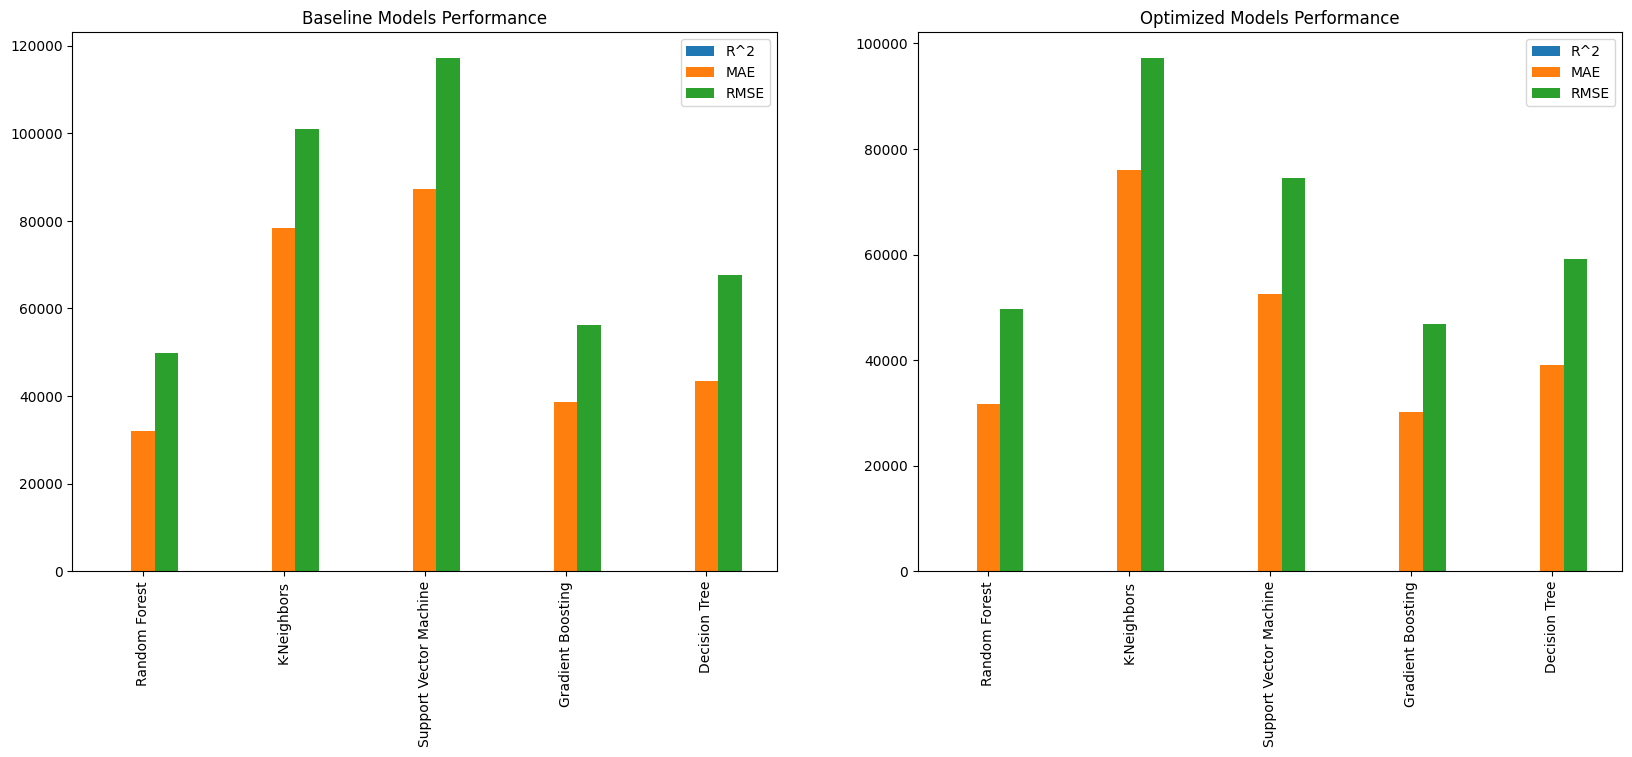

In [118]:
# Компилируем результаты базовых моделей и оптимизированных моделей
comparison_results = {"Базовые": base_results, "Оптимизированные": optimized_results}

for category, results in comparison_results.items():
    print(f"\n{category} Модели:")
    for name, metrics in results.items():
        print(f"{name}: R^2: {metrics['R^2']:.4f}, MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}")

# Визуализируем результаты базовых моделей и оптимизированных моделей
baseline_df = pd.DataFrame(base_results).T
optimized_df = pd.DataFrame(optimized_results).T

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

baseline_df.plot(kind='bar', ax=axes[0], title='Baseline Models Performance')
optimized_df.plot(kind='bar', ax=axes[1], title='Optimized Models Performance')
print('\n')
plt.show()
print('\n')

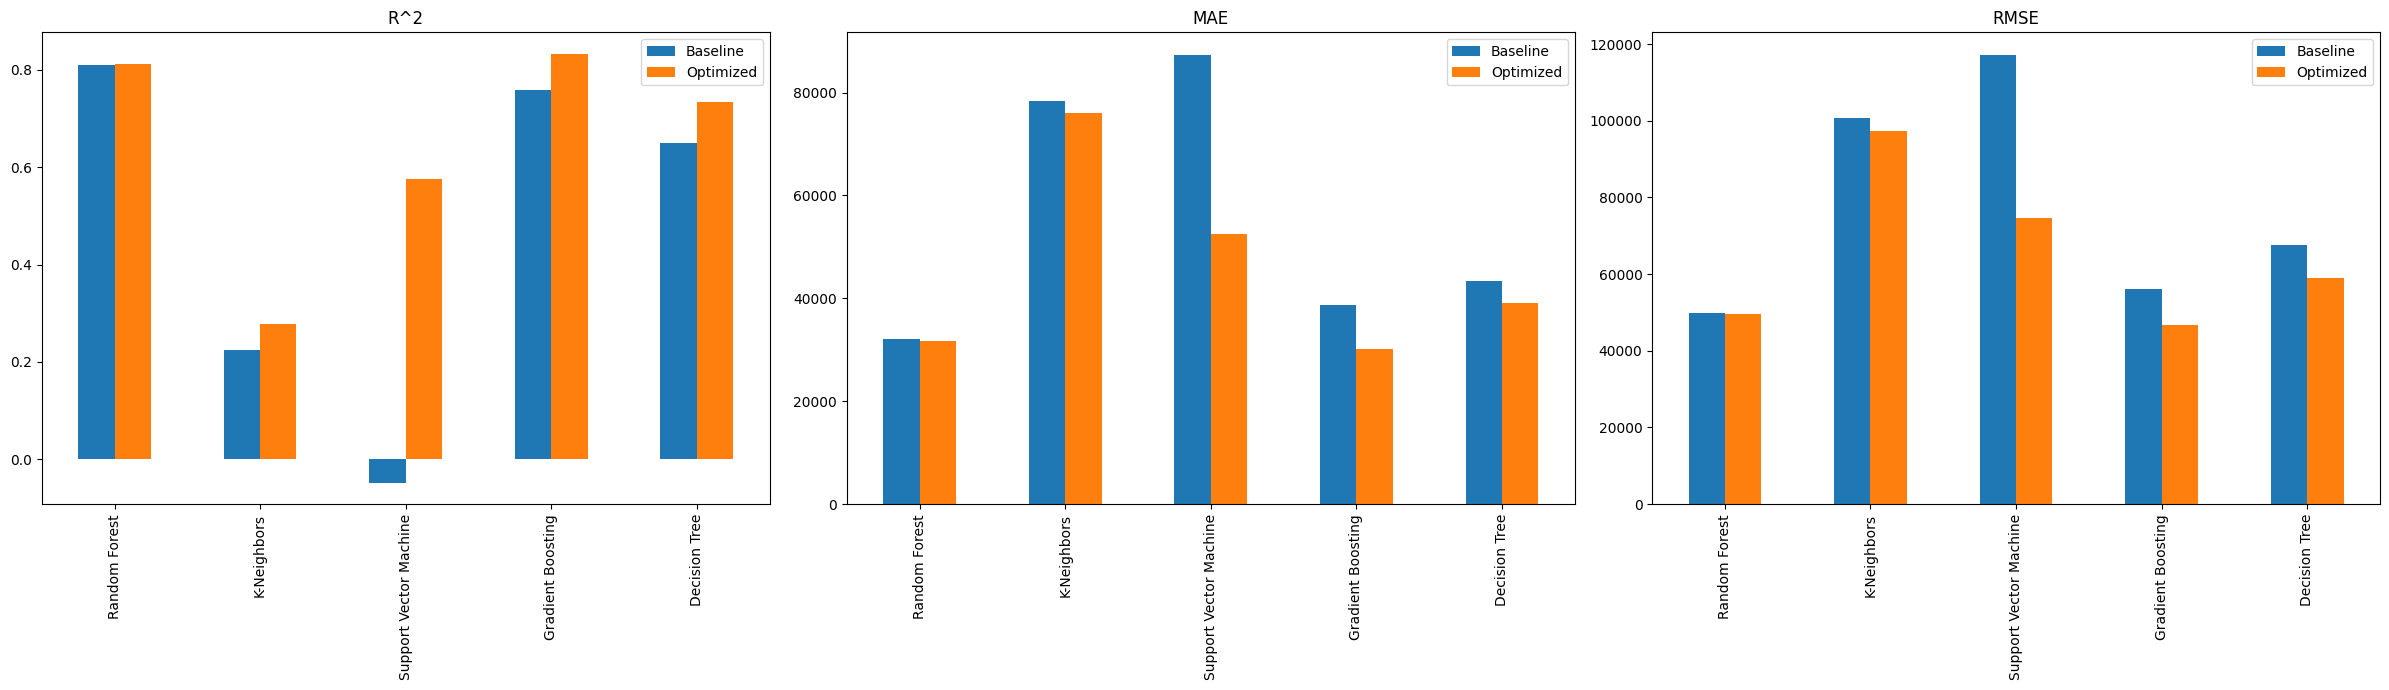

In [116]:
# Превращаем результаты в DataFrame
baseline_df = pd.DataFrame(base_results).T
optimized_df = pd.DataFrame(optimized_results).T

# Создаем графики для каждой метрики
metrics = ['R^2', 'MAE', 'RMSE']
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

for i, metric in enumerate(metrics):
    metric_data = pd.DataFrame({
        'Baseline': baseline_df[metric],
        'Optimized': optimized_df[metric]
    })
    metric_data.plot(kind='bar', ax=axes[i], title=metric)

plt.tight_layout()
print('\n')
plt.show()
print('\n')

## Заключение и выводы

#### Описание исследования

В рамках исследования был проведен анализ эффективности разнообразных алгоритмов машинного обучения применительно к задачам регрессионного анализа. В числе протестированных моделей оказались дерево решений, метод векторов опоры, ансамбль случайных лесов, техника градиентного бустинга и алгоритм K-ближайших соседей.

#### Сравнение моделей

Для каждой модели были измерены три метрики: \( R^2 \) (коэффициент детерминации), MAE (средняя абсолютная ошибка) и RMSE (корень из средней квадратической ошибки). Сравнение проводилось в двух этапах: до оптимизации гиперпараметров (Базовые Модели) и после их оптимизации (Оптимизированные Модели).

**Базовые Модели:**
- **Random Forest: R^2:** 0.8104, MAE: 32009.1166, RMSE: 49844.2873
- **K-Neighbors: R^2:** 0.2237, MAE: 78365.3029, RMSE: 100856.5830
- **Support Vector Machine:** R^2: -0.0487, MAE: 87342.2458, RMSE: 117224.9936
- **Gradient Boosting: R^2:** 0.7597, MAE: 38634.9416, RMSE: 56116.8710
- **Decision Tree: R^2:** 0.6506, MAE: 43323.6873, RMSE: 67668.4107

**Оптимизированные Модели:**
- **Random Forest: R^2:** 0.8118, MAE: 31760.6819, RMSE: 49657.8142
- **K-Neighbors: R^2:** 0.2779, MAE: 75993.6938, RMSE: 97278.4378
- **Support Vector Machine:** R^2: 0.5754, MAE: 52560.9242, RMSE: 74591.7022
- **Gradient Boosting:** R^2: 0.8333, MAE: 30171.5567, RMSE: 46742.1416
- **Decision Tree: R^2:** 0.7332, MAE: 39160.4298, RMSE: 59125.3753

## Итоги

1. **Повышение эффективности через настройку гиперпараметров:**
   Оптимизация гиперпараметров привела к улучшению всех рассмотренных моделей. Это подчеркивает значимость тонкой настройки гиперпараметров для повышения производительности алгоритмов. К примеру, коэффициент детерминации \( R^2 \) для модели дерева решений возрос с 0.6506 до 0.7332, а средняя абсолютная ошибка (MAE) сократилась с 43323.6873 до 39160.4298.

2. **Наивысшая эффективность:**
   - Самые точные результаты среди оптимизированных алгоритмов продемонстрировала модель случайного леса, достигнув \( R^2 = 0.8118 \), с MAE = 31760.6819 и RMSE = 49657.8142, что говорит о её превосходстве в точности предсказаний.
   - Модель градиентного бустинга также показала высокие показатели (\( R^2 = 0.8333 \), MAE = 30171.5567, RMSE = 46742.1416), слегка уступая модели случайного леса по ключевым метрикам.

3. **Минимальная эффективность:**
   - Метод опорных векторов продемонстрировал наименее удовлетворительные результаты до и после настройки гиперпараметров. Это особенно заметно по начальным данным, где \( R^2 = -0.0487 \), указывая на неспособность модели предсказывать результаты лучше, чем базовое среднее.

4. **Результаты других алгоритмов:**
   - Дерево решений и K-ближайших соседей также улучшили свои показатели после корректировки гиперпараметров, однако они не достигли уровня случайного леса и градиентного бустинга.

## Вывод

Исходя из проведённого анализа, для регрессионных задач на выбранном наборе данных предпочтительнее использовать модель случайного леса или градиентного бустинга, предварительно проведя детальную настройку гиперпараметров. Эти алгоритмы показали лучшие результаты в сравнении с остальными и способны обеспечить точные и стабильные прогнозы. 